In [25]:
import pandas as pd
from nltk.corpus import stopwords
import string
import re
from nltk.tokenize.regexp import regexp_tokenize

In [2]:
emails = pd.read_csv('email_df.csv', index_col=0)

In [128]:
stop_words = stopwords.words('english')

In [116]:
clean = test_email.lower().replace("\n", " ").translate(str.maketrans(' ',' ', '!"#$%&–\'.()*+,-/:;<=>?@[\]^_`{|}~'))
clean

'america is an idea im eager to move this country forward to help rebuild our communities from this devastating pandemic and to turn a new leaf after four years of stalled progress and devastation as we move forward we can change the priorities of our leaders together we can opt for decency over division love over hate hope over fear thats what this video is about  and thats what this election is about america is an idea i believe that america is an idea  a living idea shaped by every decision we make we the people have the power to choose im asking for your vote by tuesday november 3 together we can and we will build a better future jim express donate if youve stored your info with actblue express well process your contribution instantly 5 15 25 50 paid for and authorized by the reelect mcgovern committee this email was sent by jim mcgovern po box 60405 worcester ma 01606 email is an important way for jim mcgovern to keep supporters like you informed about critical issues and to build

In [119]:
' '.join([word for word in regexp_tokenize(clean, pattern='\w+') if word not in stop_words])

'america idea im eager move country forward help rebuild communities devastating pandemic turn new leaf four years stalled progress devastation move forward change priorities leaders together opt decency division love hate hope fear thats video thats election america idea believe america idea living idea shaped every decision make people power choose im asking vote tuesday november 3 together build better future jim express donate youve stored info actblue express well process contribution instantly 5 15 25 50 paid authorized reelect mcgovern committee email sent jim mcgovern po box 60405 worcester 01606 email important way jim mcgovern keep supporters like informed critical issues build winning grassroots campaign much email switch less email option email sent emailredacted click change email address longer want hear jim mcgovern click get lists instantly questions concerns contact us'

In [124]:
t = str.maketrans(' ',' ', '!"#$%&–\'.()*+,-/:;<=>?@[\]^_`{|}~')

In [129]:
emails['clean'] = emails['text'].apply(lambda x: str(x).lower().replace("\n", " ").translate(t))
emails['clean'] = emails['clean'].apply(lambda x: ' '.join([word for word in regexp_tokenize(x, pattern='\w+') if word not in stop_words]))

# train, test, split

In [143]:
from sklearn.model_selection import train_test_split

X = emails['clean']
y = emails['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.4, stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, random_state=42, test_size=0.2, stratify=y_test)

X_val.shape

(25321,)

In [145]:
y_train.value_counts(normalize=True)

Liberal         0.782543
Conservative    0.211106
Center          0.006351
Name: target, dtype: float64

In [144]:
from sklearn.feature_extraction.text import CountVectorizer

ctv = CountVectorizer(max_df=0.98, min_df = 0.02)

ctv.fit(X_train)

X_train_vectorized = ctv.transform(X_train)
X_test_vectorized = ctv.transform(X_test)

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train_vectorized, y_train)

clf.score(X_test_vectorized, y_test)



0.7891093996840443

In [170]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, plot_confusion_matrix, roc_auc_score, plot_roc_curve

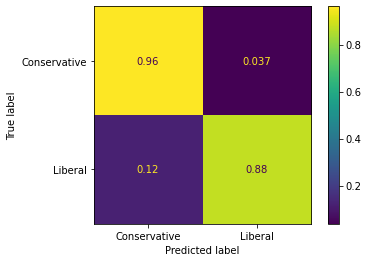

In [178]:
plot_confusion_matrix(clf, X_test_vectorized, y_test, normalize='true')

# binomial categories

In [148]:
emails2 = emails[emails['target'] != 'Center']
emails2

,text,tokens,target,clean
0,Welcome to the team!. Thanks for joining the t...,"['Welcome', 'team', '!.', 'Thanks', 'joining',...",Liberal,welcome team thanks joining team name kathleen...
1,Quickly closing in. We’re just 5 days away fro...,"['Quickly', 'closing', '.', 'We', '’re', '5', ...",Liberal,quickly closing 5 days away june 30th fec publ...
2,Welcome to the team!. Thanks for joining the t...,"['Welcome', 'team', '!.', 'Thanks', 'joining',...",Liberal,welcome team thanks joining team name kathleen...
3,Remembering Dr. King. Today we remember and ho...,"['Remembering', 'Dr', '.', 'King', '.', 'Today...",Liberal,remembering dr king today remember honor legac...
4,We need to close the gap fast. Here’s the trut...,"['We', 'need', 'close', 'gap', 'fast', '.', 'H...",Liberal,need close gap fast truthsummer difficult fund...
...,...,...,...,...
317361,Help Lisa Win. HELP LISA PAVLOCK WIN!\nThank y...,"['Help', 'Lisa', 'Win', '.', 'HELP', 'LISA', '...",Liberal,help lisa win help lisa pavlock win thank much...
317362,[Valdez-Ortega for Congress] Democratic Debate...,"['[Valdez-Ortega', 'Congress', ']', 'Democrati...",Liberal,valdezortega congress democratic debate invita...
317363,Election Day is Tomorrow. DM Campaign Logo \(S...,"['Election', 'Day', 'Tomorrow', '.', 'DM', 'Ca...",Conservative,election day tomorrow dm campaign logo solid p...
317364,"Volunteer Opportunities. Hello,\nI'm Bri Buent...","['Volunteer', 'Opportunities', '.', 'Hello', '...",Liberal,volunteer opportunities hello im bri buentello...


In [153]:
emails2['target'].value_counts()

Liberal         247676
Conservative     66815
Name: target, dtype: int64

In [154]:
from sklearn.model_selection import train_test_split

X = emails2['clean']
y = emails2['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.4, stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, random_state=42, test_size=0.2, stratify=y_test)

X_val.shape

(25160,)

In [155]:
from sklearn.feature_extraction.text import CountVectorizer

ctv = CountVectorizer(max_df=0.98, min_df = 0.02)

ctv.fit(X_train)

X_train_vectorized = ctv.transform(X_train)
X_test_vectorized = ctv.transform(X_test)

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train_vectorized, y_train)

clf.score(X_test_vectorized, y_test)


0.8966582867136341

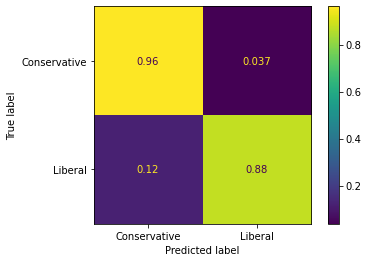

In [160]:
plot_confusion_matrix(clf, X_test_vectorized, y_test, normalize='true')

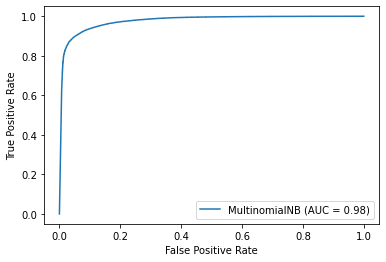

In [173]:
plot_roc_curve(clf, X_test_vectorized, y_test)

In [163]:
clf.predict(X_test_vectorized) != y_test

242922    False
196239    False
245824    False
85966     False
263206    False
          ...  
309279    False
21569     False
289361    False
249183    False
166645    False
Name: target, Length: 100637, dtype: bool

In [169]:
emails2['clean'].iloc[21569]

'cnn bernie sanders drops 2020 race heres means 2020 democratic senatorial campaign committee important notice bernie sanders drops presidential race historic news need know vote november official general election poll participant id 11107196voting live biden trump team joe biden officially democratic nominee take trump historic showdown future america selected top democratic supporter take part brand new general election poll counting response keep voting open 1159 pm tonight still need 74 responses maine dont wait cast vote vote november participant user id 11107196 email emailredacted general election choice verification needed bidentrump youve recently submitted response done different email address thank online records may date dont worry responses recorded photo gage skidmore cc bysa 20 dscc committee solely dedicated supporting democrats us senate work relies grassroots supporters like youd like make contribution support us please click click receive fewer emails click unsubscri

In [182]:
clf.predict_proba(X_test_vectorized)

array([[6.86942382e-51, 1.00000000e+00],
       [5.92410269e-04, 9.99407590e-01],
       [4.59075619e-55, 1.00000000e+00],
       ...,
       [6.57753908e-25, 1.00000000e+00],
       [2.17885146e-89, 1.00000000e+00],
       [4.60193146e-40, 1.00000000e+00]])

# Decision Trees